In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.signal import convolve2d
from scipy.io import readsav

import datetime
import matplotlib.dates as date
from datetime import datetime
import matplotlib.patches as patches

import pandas as pd
from sunpy.timeseries import TimeSeries
import matplotlib.gridspec as gridspec

In [2]:
clrs = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

# GOES data 

In [3]:
fn = 'https://umbra.nascom.nasa.gov/goes/fits/2014/go1520141025.fits'
g1 = TimeSeries(fn)

In [4]:
t = pd.Timestamp('2014-10-25T17:05:59')
tdts = datetime(2014, 10, 25,17,5,59)

2014-10-25 16:36:59.921999931 2014-10-25 17:30:12.718999863


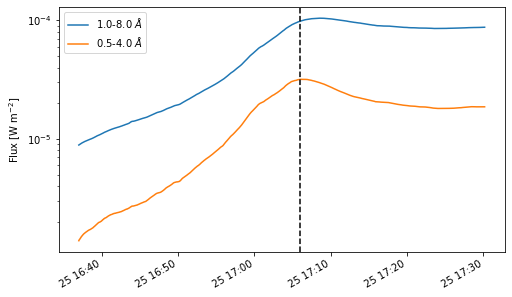

In [5]:
i_str,i_end=29191,30750
print(g1.index[i_str],g1.index[i_end])

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(g1.index[i_str:i_end], g1.quantity("xrsb")[i_str:i_end],label='1.0-8.0 $\AA$')
ax.plot(g1.index[i_str:i_end], g1.quantity("xrsa")[i_str:i_end],label='0.5-4.0 $\AA$')
ax.set_ylabel("Flux [W m$^{-2}$]")

ax.legend(loc=2)
ax.set_yscale('log')
ax.axvline(t,linestyle='--',color='black')
fig.autofmt_xdate()

# IRIS + AIA maps (for our pixel)

In [6]:
maps = readsav('/Users/WilliamHenryAshfieldIV/Desktop/paperII/iris_aia_maps.sav',verbose=False,python_dict=False)

In [7]:
aia_map = maps.tsmap_1600['data']
time_aia = maps.tsmap_1600['time']

In [8]:
aia_dat = np.zeros((len(aia_map),aia_map[0].shape[0],aia_map[0].shape[1]))
for i in range(0,len(aia_map)):
    aia_dat[i,:,:] = aia_map[i]

In [9]:
exs = maps.tsmap_1600['dur'][0] #exposure time
aia_px = aia_dat[:,40,107]/exs
DNperS = aia_px/exs

In [10]:
i_str,i_end = 1100,1700
intt = maps.d['int'][0]
time_iris = maps.d['time_ccsds'][0]
time_iris = time_iris[i_str:i_end]
time_iris[326]

b'2014-10-25T17:05:59.030'

In [11]:
datetime_object = datetime.strptime(time_aia[77].decode("utf-8"), '%d-%b-%Y %H:%M:%S.%f')

In [12]:
# convert iris time data into datetime object to plot via plot_date
tm_iris = np.zeros(len(time_iris))
for i in range (0,len(time_iris)):
    time_string = time_iris[i].decode("utf-8")
    datetime_object = datetime.strptime(time_string, '%Y-%m-%dT%H:%M:%S.%f')
    tm_iris[i] = date.date2num(datetime_object)

# same for aia data
tm_aia = np.zeros(len(time_aia))
for i in range (0,len(time_aia)):
    time_string = time_aia[i].decode("utf-8")
    datetime_object = datetime.strptime(time_string, '%d-%b-%Y %H:%M:%S.%f')
    tm_aia[i] = date.date2num(datetime_object)

In [13]:
slit_time = np.sum(intt[:,i_str:i_end,:],axis=2)
slit_time.shape

(387, 600)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  


b'25-Oct-2014 17:05:52.130'

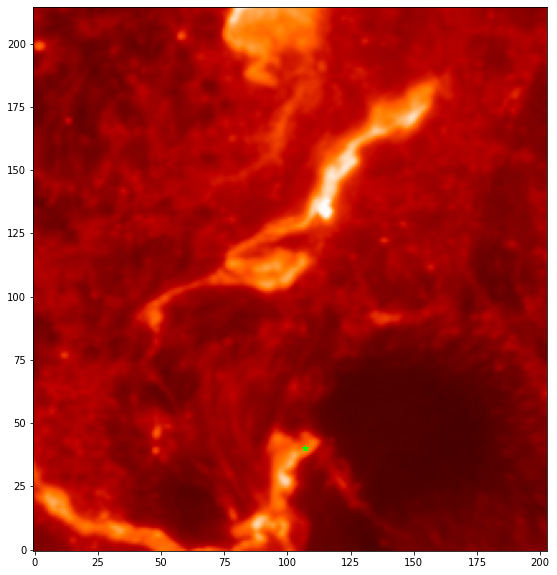

In [14]:
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(aia_map[74],norm=LogNorm(),vmin=15,cmap='gist_heat',origin='lower')
ax.scatter(107, 40,marker='*',color='lime')
maps.tsmap_1600['time'][74]

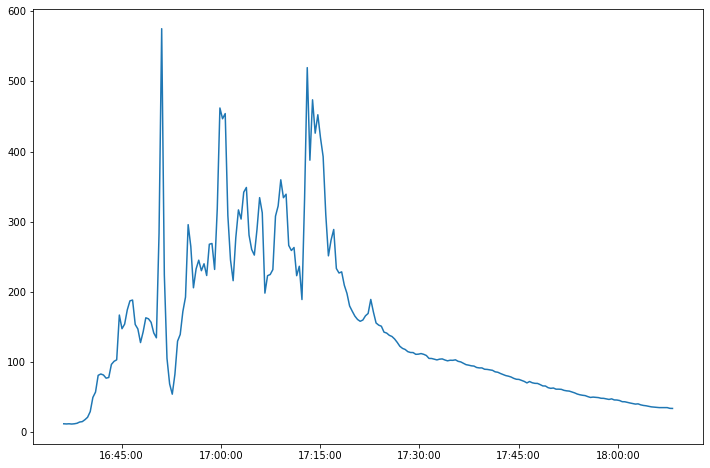

In [15]:
#fig, ax = plt.subplots(figsize = (12,8))
#ax.plot(slit_time[69,:]/np.max(slit_time[69,:]))
#ax.plot(DNperS/np.max(DNperS))
fig, ax = plt.subplots(figsize = (12,8))
#ax.plot(slit_time[69,:]/np.max(slit_time[69,:]))
ax.plot_date(tm_aia,DNperS,'-')
ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))

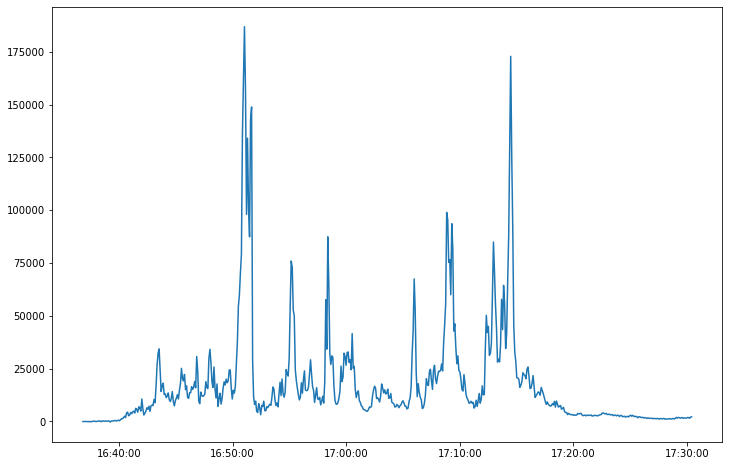

In [16]:
fig, ax = plt.subplots(figsize = (12,8))
#ax.plot(slit_time[69,:]/np.max(slit_time[69,:]))
ax.plot_date(tm_iris,slit_time[69,:],'-')
ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))

In [17]:
t = pd.Timestamp('2014-10-25T17:05:59')
tdts = datetime(2014, 10, 25,17,5,59)

max DNperS for AIA:  574.981807620424


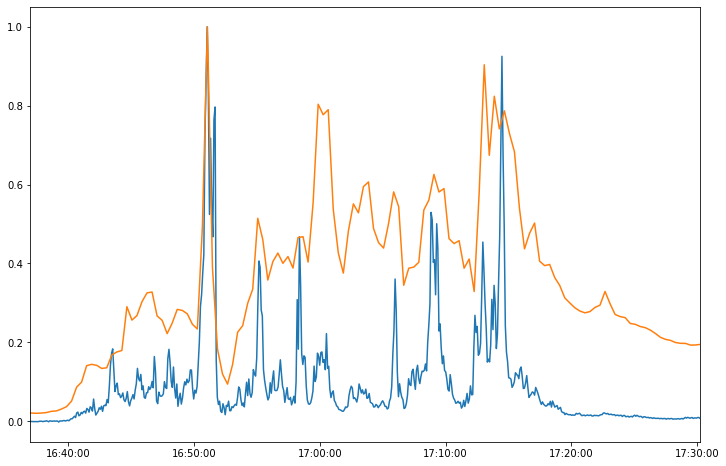

In [18]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot_date(tm_iris,slit_time[69,:]/np.max(slit_time[69,:]),'-')
ax.plot_date(tm_aia,DNperS/np.max(DNperS),'-')
print('max DNperS for AIA: ',np.max(DNperS))

ax.set_xlim([datetime(2014, 10, 25,16,36,59,92), datetime(2014, 10, 25,17,30,12,72)])

ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))

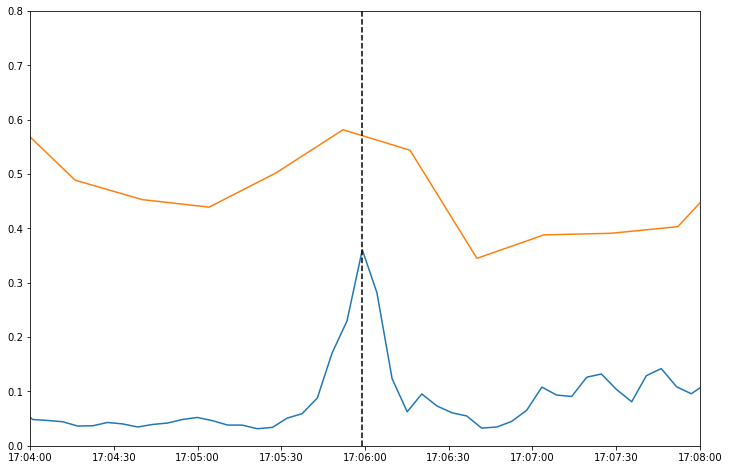

In [19]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot_date(tm_iris,slit_time[69,:]/np.max(slit_time[69,:]),'-')
ax.plot_date(tm_aia,DNperS/np.max(DNperS),'-')

ax.set_xlim([datetime(2014, 10, 25,17,4,0), datetime(2014, 10, 25,17,8,0)])
ax.set_ylim(0.0,0.8)

ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
ax.axvline(t,linestyle='--',color='black')

## Grand daddy figure

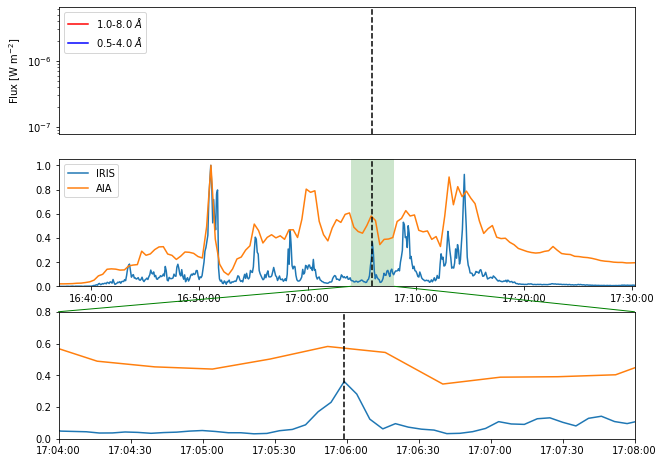

In [20]:
fig = plt.figure(figsize=(8, 6))
plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)

# Create zeroth axes figure
sub0 = fig.add_subplot(3,1,1)
sub0.plot(g1.index[i_str:i_end], g1.quantity("xrsb")[i_str:i_end],label='1.0-8.0 $\AA$',color='red')
sub0.plot(g1.index[i_str:i_end], g1.quantity("xrsa")[i_str:i_end],label='0.5-4.0 $\AA$',color='blue')
sub0.set_ylabel("Flux [W m$^{-2}$]")
#ax.set_xlabel("Time")
sub0.xaxis.set_visible(False)
sub0.xaxis.set_ticklabels([])
sub0.legend(loc=2)
sub0.set_yscale('log')
sub0.axvline(t,linestyle='--',color='black')
sub0.set_xlim([datetime(2014, 10, 25,16,36,59,92), datetime(2014, 10, 25,17,30,12,72)])



# Create first axes figure
sub1 = fig.add_subplot(3,1,2) 
sub1.plot_date(tm_iris,slit_time[69,:]/np.max(slit_time[69,:]),'-',label = 'IRIS')
sub1.plot_date(tm_aia,DNperS/np.max(DNperS),'-',label='AIA')
sub1.set_xlim([datetime(2014, 10, 25,16,36,59,92), datetime(2014, 10, 25,17,30,12,72)])
sub1.set_ylim(0.0,1.05)
sub1.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
sub1.axvline(t,linestyle='--',color='black')
sub1.legend(loc=2)

# Create second axes figure
sub2 = fig.add_subplot(3,1,3) # two rows, two columns, second cell
sub2.plot_date(tm_iris,slit_time[69,:]/np.max(slit_time[69,:]),'-')
sub2.plot_date(tm_aia,DNperS/np.max(DNperS),'-')
#sub2.set_xlim([datetime(2014, 10, 25,17,4,0), datetime(2014, 10, 25,17,8,0)])
sub2.set_xlim(datetime(2014, 10, 25,17,4,0), datetime(2014, 10, 25,17,8,0))
sub2.set_ylim(0.0,0.8)
sub2.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
sub2.axvline(t,linestyle='--',color='black')

sub1.get_shared_x_axes().join(sub1, sub2)


# Create blocked area in third axes
sub1.fill_between((datetime(2014, 10, 25,17,4,0), datetime(2014, 10, 25,17,8,0)), 0, 1.05, facecolor='green', alpha=0.2) # blocked area for first axes


# Create Connection patches
startt = date.date2num(datetime(2014, 10, 25,17,4,0))
endt = date.date2num(datetime(2014, 10, 25,17,8,0))
con1 = patches.ConnectionPatch(xyA=(startt, 0.0), coordsA=sub1.transData, 
                       xyB=(startt, 0.8), coordsB=sub2.transData, color = 'green')
con2 = patches.ConnectionPatch(xyA=(endt, 0.0), coordsA=sub1.transData, 
                       xyB=(endt, 0.8), coordsB=sub2.transData, color = 'green')
# Add  to figure
fig.add_artist(con1)
fig.add_artist(con2)

In [21]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# Rebuild the matplotlib font cache
fm._rebuild()

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.usetex'] = True

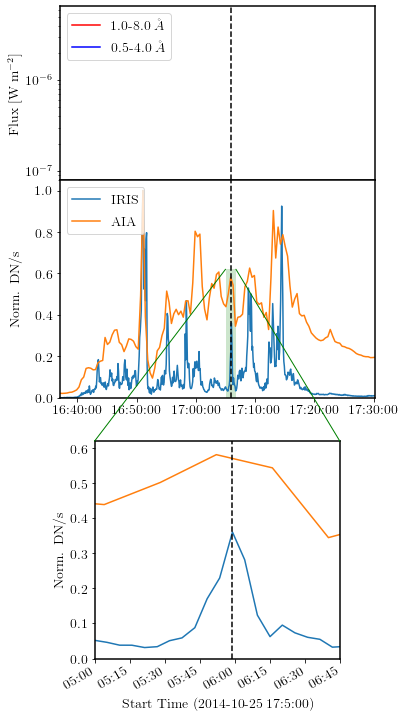

In [22]:
fig8 = plt.figure(figsize=(6, 12),constrained_layout=False)
gs1 = fig8.add_gridspec(nrows=15, ncols=9, left=0.17, right=0.9, wspace=0.0,hspace=0.0)

# GOES
sub0 = fig8.add_subplot(gs1[0:4, :])
sub0.plot(g1.index[i_str:i_end], g1.quantity("xrsb")[i_str:i_end],label='1.0-8.0 $\AA$',color='red')
sub0.plot(g1.index[i_str:i_end], g1.quantity("xrsa")[i_str:i_end],label='0.5-4.0 $\AA$',color='blue')
#sub0.plot(g1.index, g1.quantity("xrsb"),label='1.0-8.0 $\AA$',color='red')
#sub0.plot(g1.index, g1.quantity("xrsa"),label='0.5-4.0 $\AA$',color='blue')
sub0.set_ylabel("Flux [W m$^{-2}$]")
#ax.set_xlabel("Time")
sub0.xaxis.set_visible(False)
sub0.xaxis.set_ticklabels([])
sub0.legend(loc=2)
sub0.set_yscale('log')
sub0.axvline(t,linestyle='--',color='black')
sub0.set_xlim([datetime(2014, 10, 25,16,36,59,92), datetime(2014, 10, 25,17,30,12,72)])


# IRIS + AIA
sub1 = fig8.add_subplot(gs1[4:9, :])
#sub1 = fig.add_subplot(3,1,2) 
sub1.plot_date(tm_iris,slit_time[69,:]/np.max(slit_time[69,:]),'-',label = 'IRIS')
sub1.plot_date(tm_aia,DNperS/np.max(DNperS),'-',label='AIA')
sub1.set_xlim([datetime(2014, 10, 25,16,36,59,92), datetime(2014, 10, 25,17,30,12,72)])
sub1.set_ylim(0.0,1.05)
sub1.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
sub1.axvline(t,linestyle='--',color='black')
sub1.legend(loc=2)
sub1.set_ylabel("Norm. DN/s")


# IRIS + AIA (ZOOM)
sub2 = fig8.add_subplot(gs1[10:15,1:8])
#sub2 = fig.add_subplot(3,1,3) # two rows, two columns, second cell
sub2.plot_date(tm_iris,slit_time[69,:]/np.max(slit_time[69,:]),'-')
sub2.plot_date(tm_aia,DNperS/np.max(DNperS),'-')
#sub2.set_xlim([datetime(2014, 10, 25,17,4,0), datetime(2014, 10, 25,17,8,0)])
sub2.set_xlim(datetime(2014, 10, 25,17,5,0), datetime(2014, 10, 25,17,6,45))
sub2.set_ylim(0.0,0.62)
sub2.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
sub2.axvline(t,linestyle='--',color='black')
sub2.set_ylabel("Norm. DN/s")
sub2.set_xlabel("Start Time (2014-10-25 17:5:00)")

#sub1.get_shared_x_axes().join(sub1, sub2)

myFmt = date.DateFormatter('%M:%S')
sub2.xaxis.set_major_formatter(myFmt)
for tick in sub2.get_xticklabels():
    tick.set_rotation(30)
    tick.set_horizontalalignment('right')
        



# Create blocked area in third axes
sub1.fill_between((datetime(2014, 10, 25,17,5,0), datetime(2014, 10, 25,17,6,45)), 0, 0.62, facecolor='green', alpha=0.2) # blocked area for first axes


# Create Connection patches
startt = date.date2num(datetime(2014, 10, 25,17,5,0))
endt = date.date2num(datetime(2014, 10, 25,17,6,45))
con1 = patches.ConnectionPatch(xyA=(startt, 0.62), coordsA=sub1.transData, 
                       xyB=(startt, 0.62), coordsB=sub2.transData, color = 'green',linestyle='-')
con2 = patches.ConnectionPatch(xyA=(endt, 0.62), coordsA=sub1.transData, 
                       xyB=(endt, 0.62), coordsB=sub2.transData, color = 'green',linestyle='-')
# Add  to figure
fig8.add_artist(con1)
fig8.add_artist(con2)

fig8.align_labels() 


In [23]:
#fig8.savefig('px_ltcrvs.pdf', format='pdf', edgecolor='w',facecolor='w', dpi = 700)

## plot gaussian!

In [24]:
dtr = date.num2date(tm_iris[326]) # i=326 is the time for our centriod
strg = dtr.strftime("%H:%M:%S")
strg

'17:05:59'

In [25]:
#len(DNperS)
dtr = date.num2date(tm_aia[74])
strg = dtr.strftime("%H:%M:%S")
strg

'17:05:52'

In [26]:
ampAIA = np.max(DNperS[73:76])
norm2aia = np.max(DNperS) # find value to normalizse gaussian by

In [27]:
def gauss(x, *a):
    # evaluate the single gaussian on x and return its value in f

    # === the exponential factors
    ef1 = np.exp( -0.5*( (x-a[1])/a[2] )**2 )

    f = a[0]*ef1

    return f

In [28]:
dtr = date.num2date(tm_iris[0])
strg = dtr.strftime("%H:%M:%S")
print('t0 iris = ',strg)
dtr = date.num2date(tm_iris[-1])
strg = dtr.strftime("%H:%M:%S")
print('tend iris = ',strg)
#time difference in seconds:
t0=36*60+50
t1 = 1*3600+30*60+23
t1-t0

t0 iris =  16:36:50
tend iris =  17:30:23


3213

In [29]:
xx = np.linspace(0,600,600) # to match tm_iris array
xx2 = np.linspace(0,3213,600) # to match tm_iris array
print(xx2[326])

1748.6444073455762


In [30]:
#aa = [1177.0099325295632,5768.4556236400331,37.907365001375474]
#aa = [1177.0099325295632,326.0,37.907365001375474] # centriod pulled from iris time series. 
#aa = [ampAIA,326.0,37.907365001375474] # amp pulled from AIA lightcurve
aa = [ampAIA,xx2[326],37.907365001375474] # amp pulled from AIA lightcurve
aa2 = [6.2,xx2[326],37.907365001375474] # amp pulled from derived heating rate

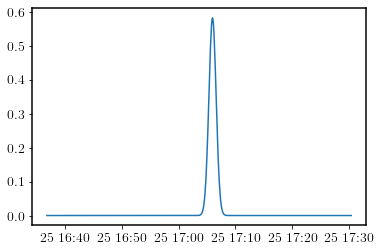

In [31]:
plt.plot_date(tm_iris,gauss(xx2,*aa)/norm2aia,'-')

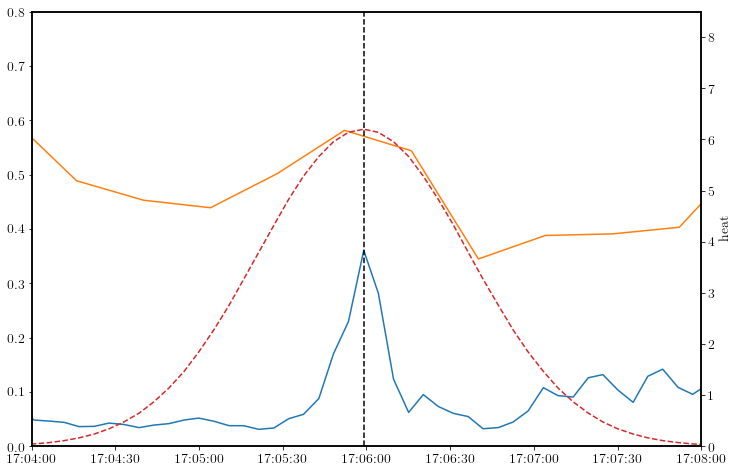

In [32]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot_date(tm_iris,slit_time[69,:]/np.max(slit_time[69,:]),'-')
ax.plot_date(tm_aia,DNperS/np.max(DNperS),'-')
ax.set_ylim(0.0,0.8)
ax.set_xlim([datetime(2014, 10, 25,17,4,0), datetime(2014, 10, 25,17,8,0)])



ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot_date(tm_iris,gauss(xx2,*aa)/norm2aia,'-')
ax2.plot_date(tm_iris,gauss(xx2,*aa2),'--',color = clrs[6])
ax2.set_ylabel("heat")
ax2.set_ylim(0.0,8.5)



ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
ax.axvline(t,linestyle='--',color='black')

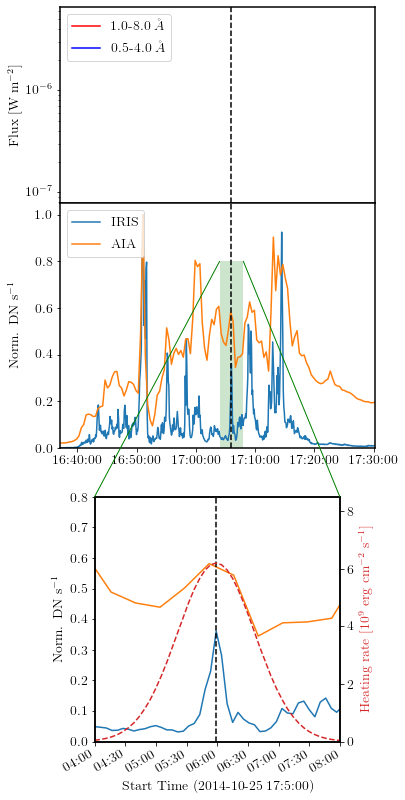

In [33]:
fig8 = plt.figure(figsize=(6, 12),constrained_layout=False)
gs1 = fig8.add_gridspec(nrows=15, ncols=9, left=0.17, right=0.9, wspace=0.0,hspace=0.0,bottom=0.1,top=0.95)

# GOES
sub0 = fig8.add_subplot(gs1[0:4, :])
sub0.plot(g1.index[i_str:i_end], g1.quantity("xrsb")[i_str:i_end],label='1.0-8.0 $\AA$',color='red')
sub0.plot(g1.index[i_str:i_end], g1.quantity("xrsa")[i_str:i_end],label='0.5-4.0 $\AA$',color='blue')
#sub0.plot(g1.index, g1.quantity("xrsb"),label='1.0-8.0 $\AA$',color='red')
#sub0.plot(g1.index, g1.quantity("xrsa"),label='0.5-4.0 $\AA$',color='blue')
sub0.set_ylabel("Flux [W m$^{-2}$]")
#ax.set_xlabel("Time")
sub0.xaxis.set_visible(False)
sub0.xaxis.set_ticklabels([])
sub0.legend(loc=2)
sub0.set_yscale('log')
sub0.axvline(t,linestyle='--',color='black')
sub0.set_xlim([datetime(2014, 10, 25,16,36,59,92), datetime(2014, 10, 25,17,30,12,72)])


# IRIS + AIA
sub1 = fig8.add_subplot(gs1[4:9, :])
#sub1 = fig.add_subplot(3,1,2) 
sub1.plot_date(tm_iris,slit_time[69,:]/np.max(slit_time[69,:]),'-',label = 'IRIS')
sub1.plot_date(tm_aia,DNperS/np.max(DNperS),'-',label='AIA')
sub1.set_xlim([datetime(2014, 10, 25,16,36,59,92), datetime(2014, 10, 25,17,30,12,72)])
sub1.set_ylim(0.0,1.05)
sub1.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
sub1.axvline(t,linestyle='--',color='black')
sub1.legend(loc=2)
sub1.set_ylabel("Norm. DN s$^{-1}$")


# IRIS + AIA (ZOOM)
sub2 = fig8.add_subplot(gs1[10:15,1:8])
#sub2 = fig.add_subplot(3,1,3) # two rows, two columns, second cell
sub2.plot_date(tm_iris,slit_time[69,:]/np.max(slit_time[69,:]),'-')
sub2.plot_date(tm_aia,DNperS/np.max(DNperS),'-')


#sub2.plot_date(tm_iris,gauss(xx2,*aa)/norm2aia,'--', color = clrs[6])

sub2.set_xlim(datetime(2014, 10, 25,17,4,0), datetime(2014, 10, 25,17,8,0))
sub2.set_ylim(0.0,0.8)
sub2.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
sub2.axvline(t,linestyle='--',color='black')
sub2.set_ylabel("Norm. DN s$^{-1}$")
sub2.set_xlabel("Start Time (2014-10-25 17:5:00)")


ax2=sub2.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot_date(tm_iris,gauss(xx2,*aa)/norm2aia,'-')
ax2.plot_date(tm_iris,gauss(xx2,*aa2),'--',color = clrs[6])
ax2.set_ylabel("Heating rate [$10^9$ erg cm$^{-2}$ s$^{-1}$]",color = clrs[6])
ax2.set_ylim(0.0,8.5)


#sub1.get_shared_x_axes().join(sub1, sub2)

myFmt = date.DateFormatter('%M:%S')
sub2.xaxis.set_major_formatter(myFmt)
for tick in sub2.get_xticklabels():
    tick.set_rotation(30)
    tick.set_horizontalalignment('right')
        



# Create blocked area in third axes
sub1.fill_between((datetime(2014, 10, 25,17,4,0), datetime(2014, 10, 25,17,8,0)), 0, 0.8, facecolor='green', alpha=0.2) # blocked area for first axes


# Create Connection patches
startt = date.date2num(datetime(2014, 10, 25,17,4,0))
endt = date.date2num(datetime(2014, 10, 25,17,8,0))
con1 = patches.ConnectionPatch(xyA=(startt, 0.8), coordsA=sub1.transData, 
                       xyB=(startt, 0.8), coordsB=sub2.transData, color = 'green',linestyle='-')
con2 = patches.ConnectionPatch(xyA=(endt, 0.8), coordsA=sub1.transData, 
                       xyB=(endt, 0.8), coordsB=sub2.transData, color = 'green',linestyle='-')
# Add  to figure
fig8.add_artist(con1)
fig8.add_artist(con2)

fig8.align_labels() 


In [34]:
#fig8.savefig('px_ltcrvs.pdf', format='pdf', edgecolor='w',facecolor='w', dpi = 700)